In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
dataset = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
dataset

,racism,sexism,other,none,label,tweet,category
0,0,1,0,0,2,s to other Halloween Hoes or else you a TRICK ...,sexism
1,0,1,0,0,2,the fbi has finally id d the zodiac killer wha...,sexism
2,1,0,0,0,1,God must have a plan for me to have someone ou...,racism
3,0,1,0,0,2,Fuckin that bitch from the back and hearing he...,sexism
4,0,1,0,0,2,bitch cunt gay slut,sexism
...,...,...,...,...,...,...,...
2494,1,0,0,0,1,"""Hey go look at that video of the man that fou...",racism
2495,0,1,0,0,2,"""Hey pussy you still there?""",sexism
2496,0,0,1,0,3,"""How about we draft all those gung-ho folks an...",other
2497,0,1,0,0,2,"""How hotter than is it?"" ""A bitch.""",sexism


In [67]:
dataset.shape

(2499, 6)

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   racism  2499 non-null   int64 
 1   sexism  2499 non-null   int64 
 2   other   2499 non-null   int64 
 3   none    2499 non-null   int64 
 4   label   2499 non-null   int64 
 5   tweet   2499 non-null   object
dtypes: int64(5), object(1)
memory usage: 117.3+ KB


In [83]:
# for index_label, row_series in df.iterrows():
    
#     if df.at[index_label, 'label'] == 0:
        
#         df.at[index_label, 'category'] = 'none' 
    
      
#     if df.at[index_label, 'label'] == 1:
        
#         df.at[index_label, 'category'] = 'racism'
        
          
#     if df.at[index_label, 'label'] == 2:
        
#         df.at[index_label, 'category'] = 'sexism'
          
#     if df.at[index_label, 'label'] == 3:
        
#         df.at[index_label, 'category'] = 'other'
        

In [84]:
# df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)

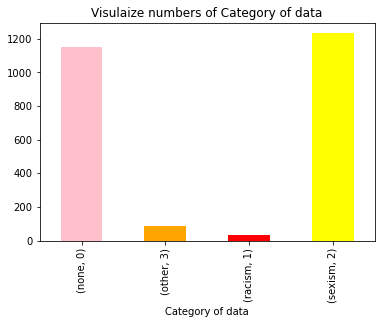

In [86]:
dataset.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

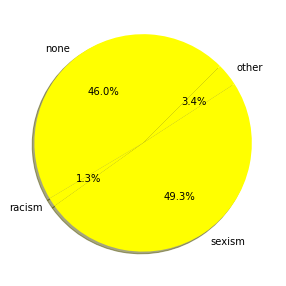

In [95]:
fig = plt.figure(figsize = (5,5))
colors = ["yellow"]
none = dataset[dataset['label'] == 0 ]
racism = dataset[dataset['label'] == 1 ]
sexism = dataset[dataset['label'] == 2]
other = dataset[dataset['label'] == 3]

count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45
             )

In [ ]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, color = 'black'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()

    print("non bullying related tweets:")

    wordcloud_draw(none, 'black')

    print("racism related tweets:")

    wordcloud_draw(racism, 'white')

    print("sexism related tweets:")

    wordcloud_draw(sexism, 'white')

    print("other hate speech tweets: ")

    wordcloud_draw(other, 'white')

wordcloud_draw(none)
wordcloud_draw(racism)
wordcloud_draw(sexism)
wordcloud_draw(other)

In [119]:
# Convert tweets to lower case

def convert_lower(text):
    return text.lower()

dataset['tweet'] = dataset['tweet'].apply(convert_lower)
dataset['tweet']

0       [halloween, hoes, else, trick, get, back, ur, ...
1       [fbi, finally, id, zodiac, killer, time, true,...
2       [god, must, plan, someone, slut, shaming, clai...
3       [fuckin, bitch, back, hearing, talk, like, slu...
4                                [bitch, cunt, gay, slut]
                              ...                        
2494    [``, hey, go, look, video, man, found, kidnapp...
2495                       [``, hey, pussy, still, ?, '']
2496    [``, draft, gung-ho, folks, send, afghanistan,...
2497                [``, hotter, ?, '', ``, bitch, ., '']
2498    [``, u, talking, hoes, bout, bro, n, em, .., t...
Name: tweet, Length: 2499, dtype: object

In [120]:
# remove all stopwords 

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
dataset['tweet'] = dataset['tweet'].apply(remove_stopwords)
dataset['tweet'][1]

TypeError: expected string or bytes-like object

In [121]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

dataset['tweet'] = dataset['tweet'].apply(remove_stopwords)
dataset['tweet'][1]

TypeError: expected string or bytes-like object

In [123]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])

dataset['tweet'] = dataset['tweet'].apply(lemmatize_word)
dataset['tweet'][1]

'fbi finally id zodiac killer time true crime slut'

In [124]:
dataset

,racism,sexism,other,none,label,tweet,category
0,0,1,0,0,2,halloween hoe else trick get back ur thot ween...,sexism
1,0,1,0,0,2,fbi finally id zodiac killer time true crime slut,sexism
2,1,0,0,0,1,god must plan someone slut shaming claiming sh...,racism
3,0,1,0,0,2,fuckin bitch back hearing talk like slut voice...,sexism
4,0,1,0,0,2,bitch cunt gay slut,sexism
...,...,...,...,...,...,...,...
2494,1,0,0,0,1,`` hey go look video man found kidnapped girl ...,racism
2495,0,1,0,0,2,`` hey pussy still ? '',sexism
2496,0,0,1,0,3,`` draft gung-ho folk send afghanistan war zon...,other
2497,0,1,0,0,2,`` hotter ? '' `` bitch . '',sexism


In [125]:
x = dataset['tweet']
y = dataset['category']

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.category.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.tweet).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (2499, 5000)
y.shape =  (2499,)


In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1749
750


In [128]:
#create list of model and accuracy dicts
perform_list = [ ]

In [131]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [139]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Multinomial Naive Bayes: % 86.8
Precision : 0.868
Recall : 0.868
F1-score : 0.868


In [135]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 90.0
Precision : 0.9
Recall : 0.9
F1-score : 0.9


In [137]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 80.27
Precision : 0.8026666666666666
Recall : 0.8026666666666666
F1-score : 0.8026666666666666


In [136]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 90.0
Precision : 0.9
Recall : 0.9
F1-score : 0.9


In [133]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 92.13
Precision : 0.9213333333333333
Recall : 0.9213333333333333
F1-score : 0.9213333333333333


In [140]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,90.80,0.91,0.91,0.91
1,Random Forest,92.13,0.92,0.92,0.92
2,Support Vector Classifer,90.00,0.90,0.90,0.90
3,Decision Tree Classifier,90.00,0.90,0.90,0.90
4,K Nearest Neighbour,80.27,0.80,0.80,0.80
5,Gaussian Naive Bayes,62.93,0.63,0.63,0.63
6,Multinomial Naive Bayes,86.80,0.87,0.87,0.87


In [142]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random Forest")


The best accuracy of model is 92.13 from Random Forest


In [143]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [154]:
y_pred1 = cv.transform(['got no chill'])
yy = classifier.predict(y_pred1)
print(yy)
result = ""

if yy == "none":
    result = "Non Bullying tweet"

elif yy == "racism":
    
    result = "Racism tweet"

elif yy == "sexism":
    
    result = "Sexism tweet"

elif yy == "other":
    
    result = "Other hate speech tweet"

result

['none']


'Non Bullying tweet'